In [1]:
import numpy as np

In [24]:
mu, sigma = 0, 1.0 # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)

In [25]:
# What is the average value from the simulation?
"The sample average is %1.4f" % np.mean(s)

'The sample average is 0.0024'

In [26]:
"The sample standard deviation is %1.4f" % np.std(s)

'The sample standard deviation is 1.0040'

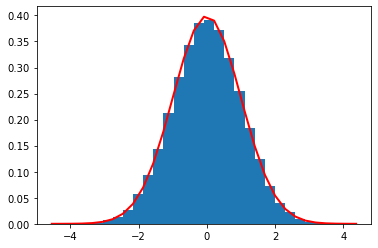

In [27]:
# Plot histogram and Gaussian curve
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [33]:
# Let's look at pdf, cdf, try calculating probabilities with proportions from sample
from scipy.stats import norm

## Probability that s is between -1 and 1
# Using CDF:
"The analytical probability is %1.3f" % (norm.cdf(1.0, loc = mu, scale = sigma) - norm.cdf(-1.0, loc = mu, scale = sigma))

'The analytical probability is 0.683'

In [34]:
# I don't have to write mu and sigma if they are standard!
"The analytical probability is %1.3f" % (norm.cdf(1.0) - norm.cdf(-1.0))

'The analytical probability is 0.683'

In [43]:
## With proportions
# Count how many times the random variable s falls between 1 and -1
s_count = (s < 1) & (s > -1)
# Calculate the proportion: count divided by total number of cases
s_prop = sum(s_count) / s.shape[0]
"The probability obtained by simulation is %1.3f" % s_prop

'The probability obtained by simulation is 0.680'

In [41]:
## What is s_count?
# Let's see the first 10 elements
s_count[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

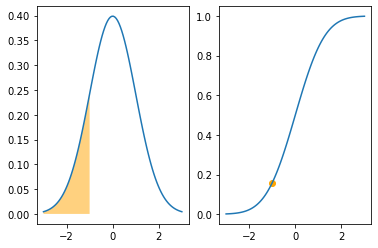

In [52]:
## Plot Gaussian PDF and CDF
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.subplot(1,2,1)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.fill_between(x[x<=-1], 0, norm.pdf(x[x<=-1], mu, sigma), facecolor = 'orange', alpha = 0.5)

plt.subplot(1,2,2)
plt.plot(x, norm.cdf(x, mu, sigma))
plt.scatter(-1, norm.cdf(-1, mu, sigma), color = 'orange')

plt.show()

In [53]:
## Back to Expectation
# Averages are estimates of expectations!
# What is the average value from the simulation?
"The sample average is %1.4f and the true expectation is %1.4f" % (np.mean(s), mu)

'The sample average is 0.0024 and the true expectation is 0.0000'

In [62]:
## Calculating variances
# Using a variance function
s_var = np.var(s)

# Using averages!
s_var_avg = np.mean(s ** 2.0) - (np.mean(s)) ** 2.0

print("The variance is %1.6f calculated directly\nand %1.6f from the definition" % (s_var, s_var_avg))

The variance is 1.007985 calculated directly
 and 1.007985 from the definition


In [64]:
## Variance of a linear transformation
# What is the variance of 3 x s + 2?
print("The variance of 3s+2 is 9 x Var[s] = 9, but we will check anyway\nWe calculate from the simulated sample: %1.4f" % np.var(3 * s + 2))

The variance of 3s+2 is 9 x Var[s] = 9, but we will check anyway
We calculate from the simulated sample: 9.0719
